[Home](../../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [67]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

####  Step 2

Load the model for testing

In [18]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


(Optional) Load a second model if you want to do comparative testing

In [19]:
filename = 'my_saved_model_v1.sav'
model_B = pickle.load(open(filename, 'rb'))

####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [62]:
x_col = 'Temp'
testing_data = pd.read_csv('2.4.1.testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Count'])

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

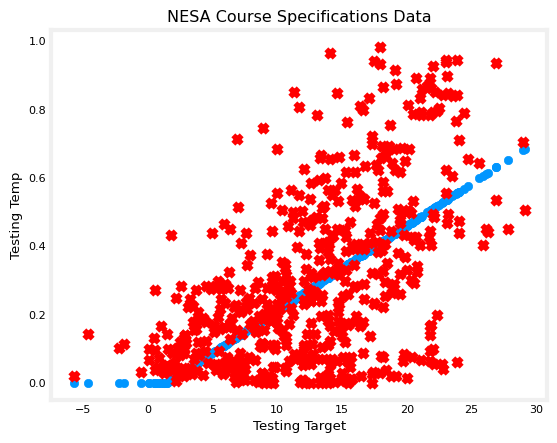

In [63]:
y_pred = model_A.predict(x_test)
y_pred = np.maximum(0, y_pred)

plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [64]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.28944275373511685


#### Step 7

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [24]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : y_test - model_A.predict(x_test).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

     Date     Count  Predicted result      Loss
0    13.5  0.315417          0.297528  0.015417
1    18.2  0.562083          0.414151  0.152083
2     2.3  0.101250          0.019617  0.081250
3     3.7  0.172500          0.054356  0.122500
4     9.4  0.020833          0.195793 -0.179167
..    ...       ...               ...       ...
539   7.3  0.023333          0.143684 -0.116667
540  13.3  0.395417          0.292565  0.105417
541   2.8  0.095000          0.032024  0.065000
542  18.0  0.657500          0.409188  0.247500
543   6.7  0.220833          0.128796  0.090833

[544 rows x 4 columns]
The cost or average loss of this model is 0.023672640931372523


You may want to do some manual predictions to understand your model.

In [11]:
print(model_A.predict([[0.1]]))
print(model_A.predict([[1]]))

[-0.03497257]
[-0.01264045]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [25]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: -0.03745391353233407
Coefficient: [0.02481346]


#### Step 9. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [26]:
filename = 'my_saved_model_v2.sav'
model_C = pickle.load(open(filename, 'rb'))

In [ ]:
# Optional
filename = 'my_saved_model_v2.sav'
model_D = pickle.load(open(filename, 'rb'))

In [38]:
mx_col = ['ComfortIndexScaled','HourDPT','Temp','WindSpeed','DewPointTemp']
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Count'])

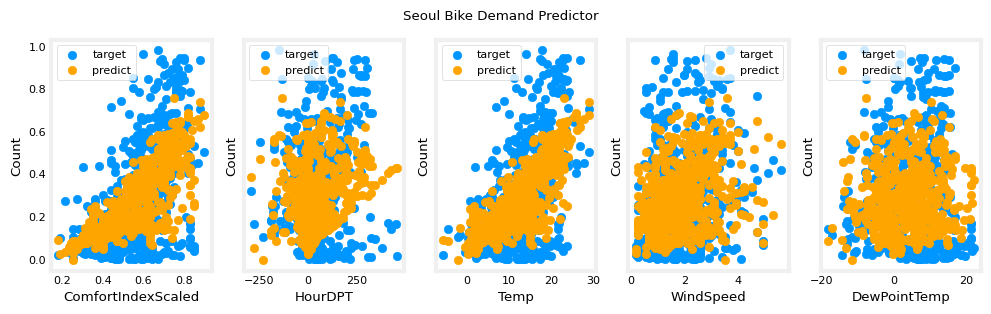

In [39]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Count"); ax[i].legend();
fig.suptitle("Seoul Bike Demand Predictor")
plt.show()

In [40]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.5005306315371953


In [53]:
print(model_C.predict([[0.5,0.1,15,3,0.1]]))

[0.47578318]


In [54]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

     ComfortIndexScaled  HourDPT  Temp  WindSpeed  DewPointTemp    Target  \
0                  0.59     89.1  13.5        1.9           9.9  0.315417   
1                  0.70    165.0  18.2        2.2          11.0  0.562083   
2                  0.29     -4.8   2.3        0.7          -0.8  0.101250   
3                  0.38     -0.0   3.7        1.6          -6.3  0.172500   
4                  0.47    163.4   9.4        1.8           8.6  0.020833   
..                  ...      ...   ...        ...           ...       ...   
539                0.40    132.0   7.3        1.9           6.6  0.023333   
540                0.58    178.2  13.3        2.1           8.1  0.395417   
541                0.32     -1.5   2.8        2.6          -1.5  0.095000   
542                0.68     16.0  18.0        3.0           1.0  0.657500   
543                0.47   -176.0   6.7        1.9          -8.8  0.220833   

     Predicted result      Cost  
0            0.202005  0.115417  
1      

In [65]:
filename = 'my_saved_model_v3.sav'
model_C = pickle.load(open(filename, 'rb'))

In [ ]:
# Transform the test data using the same PolynomialFeatures object
poly = PolynomialFeatures(degree=6, include_bias=False)
poly_features = poly.fit_transform(x)

# Predict using the polynomial regression model
y_pred = model_C.predict(poly_features)

# Clip negative predictions to 0
y_pred = np.maximum(0, y_pred)

# Plot the results
plt.scatter(x_test, y_pred, label="Predicted", alpha=0.7)
plt.scatter(x_test, y_test, marker='x', c='r', label="Actual", alpha=0.7)
plt.title("Polynomial Regression Evaluation")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.legend()
plt.show()

NameError: name 'x' is not defined

In [ ]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: -0.06895495780324512
Coefficient: [ 0.0285689  -0.00030807]


#### Step 10

When your model is ready for operations, move it to the [3.Operations\3.1.Deploy_Model](\3.Operations\3.1.Deploy_Model) folder.